# EDA

In [1]:
# import necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import scipy.stats as scs
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
from sklearn.feature_selection import RFE
import seaborn as sns
sns.set_style('darkgrid')

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

In [2]:
terry_df = pd.read_csv('../data/terry_clean.csv')

In [3]:
terry_df.head()

,date,subject_id,subject_age,subject_race,subject_gender,stop_resolution,weapon_type,officer_id,officer_age,officer_race,officer_gender,officer_squad,initial_call_type,call_type,arrest,frisk,precinct,sector,beat
0,2015-10-16,-1,26 - 35,Asian,Male,Arrest,None,7500,31,Black or African American,M,SOUTH PCT 1ST W - ROBERT,NaN,NaN,0,0.0,South,O,O2
1,2015-03-19,-1,26 - 35,Other,Male,Field Contact,None,5670,50,White,M,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN
2,2015-04-01,-1,26 - 35,Other,Male,Field Contact,None,7539,52,White,M,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN
3,2015-04-03,-1,26 - 35,Black or African American,Male,Field Contact,None,6973,38,White,M,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN
4,2015-04-05,-1,26 - 35,Black or African American,Male,Field Contact,None,7402,42,White,M,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN


In [4]:
terry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44331 entries, 0 to 44330
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               44331 non-null  object 
 1   subject_id         44331 non-null  int64  
 2   subject_age        44331 non-null  object 
 3   subject_race       44331 non-null  object 
 4   subject_gender     44331 non-null  object 
 5   stop_resolution    44331 non-null  object 
 6   weapon_type        34687 non-null  object 
 7   officer_id         44331 non-null  int64  
 8   officer_age        44331 non-null  int64  
 9   officer_race       44331 non-null  object 
 10  officer_gender     44331 non-null  object 
 11  officer_squad      43796 non-null  object 
 12  initial_call_type  31518 non-null  object 
 13  call_type          31518 non-null  object 
 14  arrest             44331 non-null  int64  
 15  frisk              44331 non-null  float64
 16  precinct           347

In [5]:
# chaning datatypes of columns
terry_df = terry_df.astype({'date':'datetime64', 'subject_age': 'category',
                            'subject_race':'category', 'subject_gender':'category',
                            'stop_resolution': 'category','weapon_type':'category',
                             'officer_race': 'category', 'officer_gender':'category',
                            'arrest':'int32', 'frisk':'float',
                            'precinct':'category', 'sector':'category', 'beat': 'category'})

# creating a 'count' column so that counting categories is easier
terry_df['count'] = 1

In [6]:
terry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44331 entries, 0 to 44330
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               44331 non-null  datetime64[ns]
 1   subject_id         44331 non-null  int64         
 2   subject_age        44331 non-null  category      
 3   subject_race       44331 non-null  category      
 4   subject_gender     44331 non-null  category      
 5   stop_resolution    44331 non-null  category      
 6   weapon_type        34687 non-null  category      
 7   officer_id         44331 non-null  int64         
 8   officer_age        44331 non-null  int64         
 9   officer_race       44331 non-null  category      
 10  officer_gender     44331 non-null  category      
 11  officer_squad      43796 non-null  object        
 12  initial_call_type  31518 non-null  object        
 13  call_type          31518 non-null  object        
 14  arrest

## Which Race is stopped the most?

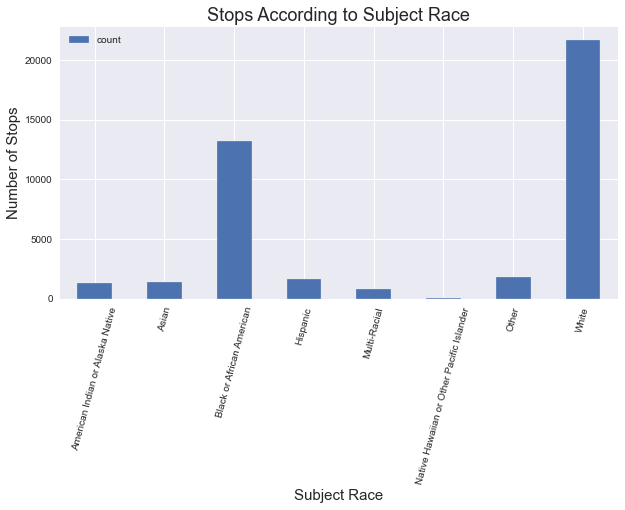

In [13]:
# creating a subset of data to answer questions
sub_race_df = terry_df[['subject_race', 'count']]
sub_race_df = sub_race_df.groupby('subject_race').count()

# eliminating unknown subject_race values
sub_race_df = sub_race_df[sub_race_df.index != 'Unknown']

sub_race_df

ax = sub_race_df.plot(kind = 'bar', figsize=(10,5))
plt.style.use('seaborn')
plt.title('Stops According to Subject Race',
         fontsize=18)
plt.xlabel('Subject Race', fontsize=15)
plt.ylabel('Number of Stops', fontsize=15)
plt.xticks(rotation=75)
plt.ticklabel_format(style='plain', axis= 'y')
plt.show()

***
## What are the races of officers who perform the most stops?

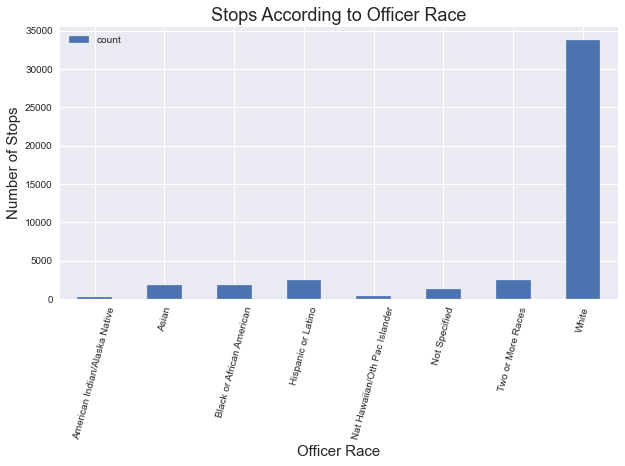

In [12]:
# creating a subset of data to answer questions
off_race_df = terry_df[['officer_race', 'count']]
off_race_df = off_race_df.groupby('officer_race').count()

ax = off_race_df.plot(kind = 'bar', figsize=(10,5))
plt.style.use('seaborn')
plt.title('Stops According to Officer Race',
         fontsize=18)
plt.xlabel('Officer Race', fontsize=15)
plt.ylabel('Number of Stops', fontsize=15)
plt.xticks(rotation=75)
plt.ticklabel_format(style='plain', axis= 'y')
plt.show()

***
## Is there a difference in ages across races?

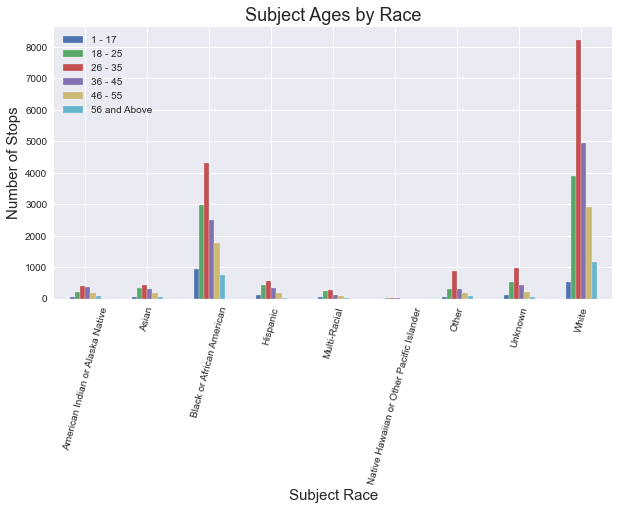

In [11]:
sub_race = terry_df[['subject_race','subject_age','count']]
sub_race = sub_race.groupby(['subject_race', 'subject_age']).count().unstack(level = 'subject_age')

sub_race.plot(kind = 'bar',  figsize=(10,5))
plt.style.use('seaborn')
plt.title('Subject Ages by Race',
         fontsize=18)
plt.xlabel('Subject Race', fontsize=15)
plt.ylabel('Number of Stops', fontsize=15)
plt.xticks(rotation=75)
plt.ticklabel_format(style='plain', axis= 'y')
plt.legend(labels = list(sub_race.columns.get_level_values(1)))
plt.show()

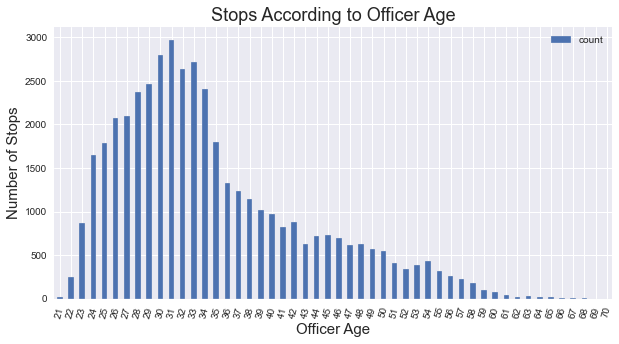

In [18]:
# creating a subset of data to answer questions
off_age_df = terry_df[['officer_age', 'count']]
off_age_df = off_age_df.groupby('officer_age').count()

ax = off_age_df.plot(kind = 'bar', figsize=(10,5))
plt.style.use('seaborn')
plt.title('Stops According to Officer Age',
         fontsize=18)
plt.xlabel('Officer Age', fontsize=15)
plt.ylabel('Number of Stops', fontsize=15)
plt.xticks(rotation=75)
plt.ticklabel_format(style='plain', axis= 'y')
plt.show()

<AxesSubplot:xlabel='officer_age'>

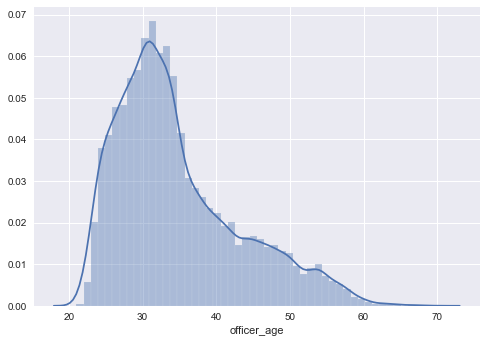

In [19]:
# this can probably be better shown as a displot
sns.distplot(terry_df['officer_age'])